<a id="toc"></a>
# barc4sr: 
## Example 05 - Emission spectra for an ideal and tabulated ondulator

[rafael.celestre@synchrotron-soleil.fr](mailto:rafael.celestre@synchrotron-soleil.fr)

<hr style="border:1px solid orange">


In [1]:
__author__ = ['Rafael Celestre']
__contact__ = 'rafael.celestre@synchrotron-soleil.fr'
__license__ = 'GPL-3.0'
__copyright__ = 'Synchrotron SOLEIL, Saint Aubin, France'
__created__ = '22/OCT/2024'
__changed__ = '22/OCT/2024'

import sys

import barc4sr.sr_undulator as und
import numpy as np
from barc4plots.barc4plots import PlotManager
from barc4sr.aux_processing import read_tuning_curve
from barc4sr.aux_utils import (
                            ElectronBeam,
                            MagneticStructure,
                            SynchrotronSource,
                            read_electron_trajectory,
                            write_magnetic_field,
)

# checking we are using the correct python:
print(sys.executable)
print(sys.version)

# # benchmarking tools
%load_ext autoreload
%autoreload 2
# %matplotlib widget

c:\Users\rafae\miniconda3\envs\dev\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


### Creation of SYNED input file (.json)

[Back to the top](#toc)

The SYNED Light Source file containing the electron beam parameters and the undulator parameters
is necessary for using barc4sr. While the preferred method for generating it remains [OASYS](https://oasys-kit.github.io/), 
barc4sr provides its own functions methods.


In [2]:
straight_section = ElectronBeam()

straight_section.from_twiss(energy=2.75, energy_spread=0.1025/100, current=0.500,
                            emittance=3.94*1E-9, coupling=1/100,
                            beta_x=3.9210, beta_y=2.1191, 
                            alpha_x=0.0514, alpha_y=0.1430,
                            eta_x=0.1632, eta_y=-0.0046,
                            etap_x=0.0015, etap_y=0.0018)

u52 = MagneticStructure(period_length=52.4e-3, number_of_periods=30)
# u52.set_resonant_energy(350, 1, straight_section.energy_in_GeV, "v")

hermes = SynchrotronSource(straight_section, u52)
hermes.write_syned_config(".\light_sources\soleil_hu52.json", "SOLEIL-HU52")


In [3]:
ei = 350
ef = 5000
ne = int((ef-ei)/5) + 1

In [4]:
tc_1 = und.tuning_curve(file_name=".\_results\SOLEIL-U52mm_on_axis",
                      json_file=".\light_sources\soleil_hu52.json",
                      photon_energy_min=ei,
                      photon_energy_max=ef,
                      photon_energy_points=ne,
                      nHarmMax = 15,
                      observation_point=21,
                      hor_slit=1e-23,
                      ver_slit=1e-23,
                      Kv_symmetry=-1,
                      electron_trajectory=False,
                      parallel=True,
                      number_macro_electrons=1)

Undulator K-tuning curve calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing on-axis tuning curve from filament electron beam in parallel ... 
Undulator K-tuning curve calculation using SRW: finished.
>> Total elapsed time: 47.73 s


In [9]:
tc_3 = und.tuning_curve(file_name=".\_results\SOLEIL-U52mm_through_slit_simple_test",
                      json_file=".\light_sources\soleil_hu52.json",
                      photon_energy_min=ei,
                      photon_energy_max=ef,
                      photon_energy_points=ne,
                      nHarmMax = 15,
                      observation_point=21,
                      hor_slit=0.0042000000140000006,
                      ver_slit=0.0042000000140000006,
                      Kv_symmetry=-1,
                      electron_trajectory=False,
                      parallel=True,
                      number_macro_electrons=1)

Undulator K-tuning curve calculation using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing flux through finite aperture (simplified / CalcElecFieldSR partially-coherent simulation) in parallel... 
completed
Undulator K-tuning curve calculation using SRW: finished.
>> Total elapsed time: 5 min 13.36 s


In [6]:
# tc_3 = und.tuning_curve(file_name=".\_results\SOLEIL-U52mm_through_slit_me",
#                       json_file=".\light_sources\soleil_hu52.json",
#                       photon_energy_min=ei,
#                       photon_energy_max=ef,
#                       photon_energy_points=ne,
#                       nHarmMax = 15,
#                       observation_point=21,
#                       hor_slit=0.0042000000140000006,
#                       ver_slit=0.0042000000140000006,
#                       Kv_symmetry=-1,
#                       electron_trajectory=False,
#                       parallel=True,
#                       number_macro_electrons=100)

flux 3.370e+14


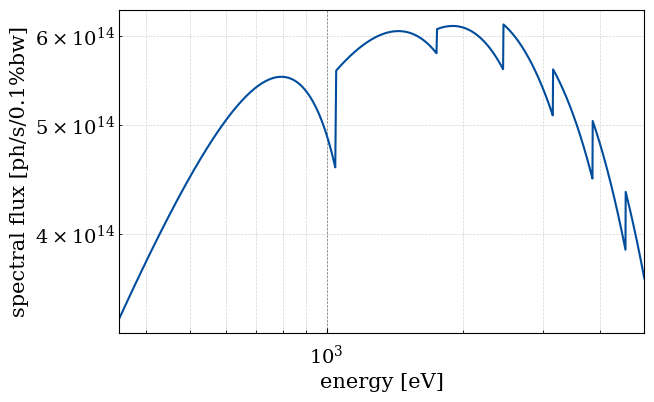

In [13]:
fl = tc_1["flux"][0,0]
print(f"flux {fl:.3e}")
img = PlotManager(tc_1["flux"][:,0], tc_1["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3, 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

flux 9.497e+14


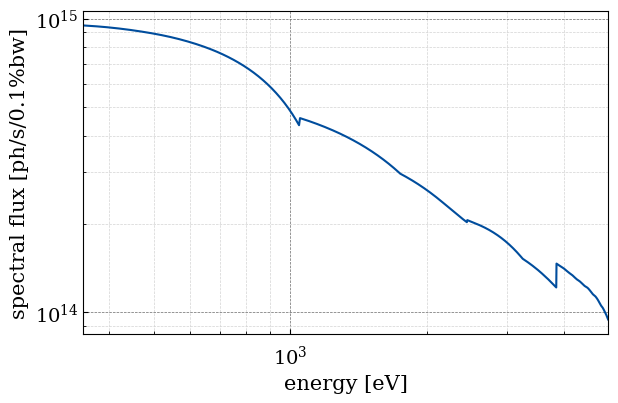

In [12]:
fl = tc_2["flux"][0,0]
print(f"flux {fl:.3e}")
img = PlotManager(tc_2["flux"][:,0], tc_2["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3, 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

flux 9.567e+14


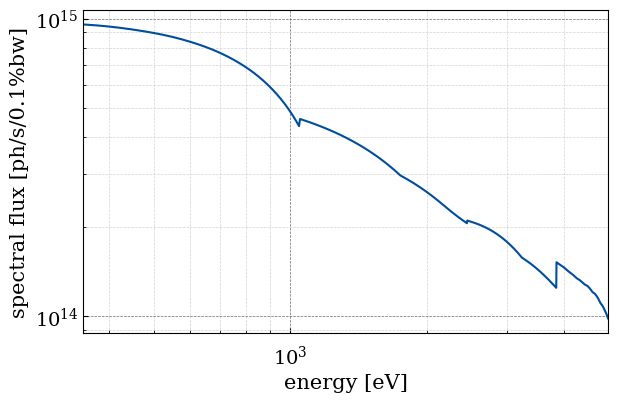

In [11]:
fl = tc_3["flux"][0,0]
print(f"flux {fl:.3e}")
img = PlotManager(tc_3["flux"][:,0], tc_3["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3, 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

In [ ]:
1/0

In [ ]:
tc = und.tuning_curve(file_name=".\_results\SOLEIL-U52mm_on_axis",
                      json_file=".\light_sources\soleil_hu52.json",
                      photon_energy_min=ei,
                      photon_energy_max=ef,
                      photon_energy_points=ne,
                      nHarmMax = 3,
                      observation_point=21,
                      hor_slit=1e-3,
                      ver_slit=1e-3,
                      Kv_symmetry=-1,
                      electron_trajectory=False)

# tc2 = und.tuning_curve(file_name=".\_results\SOLEIL-U52mm_on_axis",
#                       json_file=".\light_sources\soleil_hu52.json",
#                       photon_energy_min=ei,
#                       photon_energy_max=ef,
#                       photon_energy_points=ne,
#                       nHarmMax = 15,
#                       even_harmonics = False,
#                       observation_point=21,
#                       hor_slit=1e-3,
#                       ver_slit=1e-3,
#                       Kv_symmetry=-1,
#                       electron_trajectory=False,
#                       number_macro_electrons=1)

In [ ]:
tc["flux"].shape
fl = tc["flux"][0,0]
print(f"flux {fl:.3e}")
img = PlotManager(tc["flux"][:,1],  tc["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

In [ ]:
tc["flux"].shape

img = PlotManager(tc["flux"][:,0],  tc["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

In [ ]:
spectrum = read_tuning_curve(".\_results\SOLEIL-U64mm_on_axis_spectrum.h5")

img = PlotManager(spectrum["spectrum"]["flux"],  spectrum["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

## Ideal undulator

### Calculation of the **on-axis** spectrum of an ideal planar undulator

This example show different ways or calling ```sr_undulator.spectrum(*args, **kwargs)```
for a filament beam 20m downstream the centre of the straight section - no emittance nor 
energy spread are accounted for here. 

[Back to the top](#toc)

In [ ]:
1/0

In [ ]:
spectrum = und.spectrum(file_name=".\_results\SOLEIL-U52mm_on_axis",
                        json_file=".\light_sources\soleil_hu52.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=20,
                        hor_slit=1e-23,
                        ver_slit=1e-23,
                        Kv_symmetry=-1,
                        electron_trajectory=False)

# eTraj_ideal = read_electron_trajectory(r".\_results\SOLEIL-U52mm_on_axis_eTraj.dat")

# magField = np.asarray([eTraj_ideal["Z"], eTraj_ideal["Bx"], eTraj_ideal["By"], eTraj_ideal["Bz"]]).T
# magField = write_magnetic_field(magField, r".\_results\SOLEIL-U52mm_srw_magField.dat")

In [ ]:
spectrum = read_spectrum(".\_results\SOLEIL-U64mm_on_axis_spectrum.h5")

img = PlotManager(spectrum["spectrum"]["flux"],  spectrum["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

### Calculation of the on spectrum of an ideal planar undulator **through a slit**

This example show different ways or calling ```sr_undulator.spectrum(*args, **kwargs)```
for a filament beam 20m downstream the centre of the straight section for a slit 20m (100 µrad) downstream the centre of the straight section - emittance and energy spread are taken into account in this calculation.

[Back to the top](#toc)

In [ ]:
spectrum = und.spectrum(file_name=".\_results\SOLEIL-U64mm_slit",
                        json_file=".\light_sources\soleil_hu64.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=20,
                        hor_slit=2e-3,
                        ver_slit=2e-3,
                        Kv_symmetry=-1)

Calculations for lower harmonics are usually very fast, but when moving away from the undulator regime into
the wiggler regime, calculations slow down. In this case, the calculations can be done in parallel:

```python
energy, flux = und.undulator_spectrum(file_name=".\_results\SOLEIL-U64mm_slit_par",
                                  json_file=".\light_sources\soleil_hu64.json",
                                  photon_energy_min=ei,
                                  photon_energy_max=ef,
                                  photon_energy_points=ne,
                                  observation_point=20,
                                  hor_slit=2e-3,
                                  ver_slit=2e-3,
                                  Kv_symmetry=-1,
                                  parallel = True)
```

In [ ]:
spectrum = und.spectrum(file_name=".\_results\SOLEIL-U64mm_slit_me",
                        json_file=".\light_sources\soleil_hu64.json",
                        photon_energy_min=ei,
                        photon_energy_max=ef,
                        photon_energy_points=ne,
                        observation_point=20,
                        hor_slit=2e-3,
                        ver_slit=2e-3,
                        Kv_symmetry=-1,
                        number_macro_electrons = 1000,
                        parallel = True)

In [ ]:
spectrum = read_spectrum([".\_results\SOLEIL-U64mm_slit_spectrum.h5"])
img = PlotManager(spectrum["spectrum"]["flux"],  spectrum["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 4).info_1d_plot(2, 'conv', 0, "-", False, 0, 1).plot_1d(enable=False)

spectrum_parallel = read_spectrum([".\_results\SOLEIL-U64mm_slit_me_spectrum.h5"])
img.image = spectrum_parallel["spectrum"]["flux"]
img.x = spectrum_parallel["spectrum"]["energy"]
img.info_1d_plot(3, "me", 1, "-", False, 0, 1).plot_1d(enable=True, hold=True)


## Tabulated undulator

### Calculation of the **on-axis** spectrum of a tabulated planar undulator

This example show different ways or calling ```sr_undulator.spectrum(*args, **kwargs)```
for a filament beam 20m downstream the centre of the straight section - no emittance nor 
energy spread are accounted for here. 

[Back to the top](#toc)

In [ ]:
energy, flux = und.spectrum(file_name=".\_results\SOLEIL-tabU64mm_on_axis",
                            json_file=".\light_sources\soleil_hu64.json",
                            photon_energy_min=ei,
                            photon_energy_max=ef,
                            photon_energy_points=ne,
                            observation_point=20,
                            hor_slit=1e-23,
                            ver_slit=1e-23,
                            Kv_symmetry=-1,
                            electron_trajectory=True,
                            magnetic_measurement=r".\light_sources\tabulated_hu64.dat")

eTraj_ideal = read_electron_trajectory(r".\_results\SOLEIL-tabU64mm_on_axis_eTraj.dat")
magField = np.asarray([eTraj_ideal["Z"], eTraj_ideal["Bx"], eTraj_ideal["By"], eTraj_ideal["Bz"]]).T
magField = write_magnetic_field(magField, r".\_results\SOLEIL-tabU64mm_srw_magField.dat")

In [ ]:
spectrum = read_spectrum([".\_results\SOLEIL-tabU64mm_on_axis_spectrum.h5"])

img = PlotManager(spectrum["spectrum"]["flux"],  spectrum["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

### Calculation of the on spectrum of an tabulated planar undulator **through a slit**

This example show different ways or calling ```sr_undulator.spectrum(*args, **kwargs)```
for a filament beam 20m downstream the centre of the straight section for a slit 20m (100 µrad) downstream the centre of the straight section - emittance and energy spread are taken into account in this calculation.

[Back to the top](#toc)

In [ ]:
energy, flux = und.spectrum(file_name=".\_results\SOLEIL-tabU64mm_slit_me",
                            json_file=".\light_sources\soleil_hu64.json",
                            photon_energy_min=ei,
                            photon_energy_max=ef,
                            photon_energy_points=ne,
                            observation_point=20,
                            hor_slit=2e-3,
                            ver_slit=2e-3,
                            Kv_symmetry=-1,
                            magnetic_measurement=r".\light_sources\tabulated_hu64.dat",
                            number_macro_electrons = 1000,
                            parallel = True)

In [ ]:
spectrum = read_spectrum([".\_results\SOLEIL-tabU64mm_slit_me_spectrum.h5"])

img = PlotManager(spectrum["spectrum"]["flux"],  spectrum["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d(enable=True)

## Comparison between the ideal and tabulated undulators

### On axis flux

In [ ]:
spectrum = read_spectrum([".\_results\SOLEIL-U64mm_on_axis_spectrum.h5"])
img = PlotManager(spectrum["spectrum"]["flux"],  spectrum["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 2)
img.info_1d_plot(2, "ideal", 0, '-', False, 0, 1).plot_1d(enable=False, hold=False)
spectrum = read_spectrum([".\_results\SOLEIL-tabU64mm_on_axis_spectrum.h5"])
img.image = spectrum["spectrum"]["flux"]
img.x = spectrum["spectrum"]["energy"]
img.info_1d_plot(3, "tabulated", 0, '-', False, 0, 1).plot_1d(enable=True, hold=True)

### Flux through a slit

In [ ]:
spectrum = read_spectrum([".\_results\SOLEIL-U64mm_slit_spectrum.h5"])
img = PlotManager(spectrum["spectrum"]["flux"],  spectrum["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")
img.aesthetics(400, True, True, 3 , 1, True, 2)
img.info_1d_plot(0, "ideal", 0, '-', False, 0, 1).plot_1d(enable=False, hold=False)
spectrum = read_spectrum([".\_results\SOLEIL-U64mm_slit_me_spectrum.h5"])
img.image = spectrum["spectrum"]["flux"]
img.x = spectrum["spectrum"]["energy"]
img.info_1d_plot(1, "ideal me.", 0, '-', False, 0, 1).plot_1d(enable=False, hold=True)
spectrum = read_spectrum([".\_results\SOLEIL-tabU64mm_slit_me_spectrum.h5"])
img.image = spectrum["spectrum"]["flux"]
img.x = spectrum["spectrum"]["energy"]
img.info_1d_plot(2, "tabulated me.", 0, '-', False, 0, 1).plot_1d(enable=True, hold=True)

In [ ]:
eTraj_ideal = read_electron_trajectory(r".\_results\SOLEIL-U64mm_on_axis_eTraj.dat")
eTraj_meas = read_electron_trajectory(r".\_results\SOLEIL-tabU64mm_on_axis_eTraj.dat")

img = PlotManager(eTraj_ideal["X"]*1E6, eTraj_ideal["Z"])
img.additional_info("horizontal electron trajectory", "longitudinal [m]", "[$\mu$m]")
img.aesthetics(400, True, True, 0 , 1, True, 2)
img.info_1d_plot(2, "ideal", 1, '-', False, 0, 1).plot_1d(enable=False, hold=False)
img.image = eTraj_meas["X"]*1E6
img.x = eTraj_meas["Z"]
img.info_1d_plot(3, "tabulated", 1, '-', False, 0, 1).plot_1d(enable=True, hold=True)

img = PlotManager(eTraj_ideal["By"], eTraj_ideal["Z"])
img.additional_info("vertical magnetic field", "longitudinal [m]", "[T]")
img.aesthetics(400, True, True, 0 , 1, True, 2)
img.info_1d_plot(2, "ideal", 1, '-', False, 0, 1).plot_1d(enable=False, hold=False)
img.image = eTraj_meas["By"]
img.x = eTraj_meas["Z"]
img.info_1d_plot(3, "tabulated", 1, '-', False, 0, 1).plot_1d(enable=True, hold=True)